<a href="https://colab.research.google.com/github/MontherAzzam/GAZASKY/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

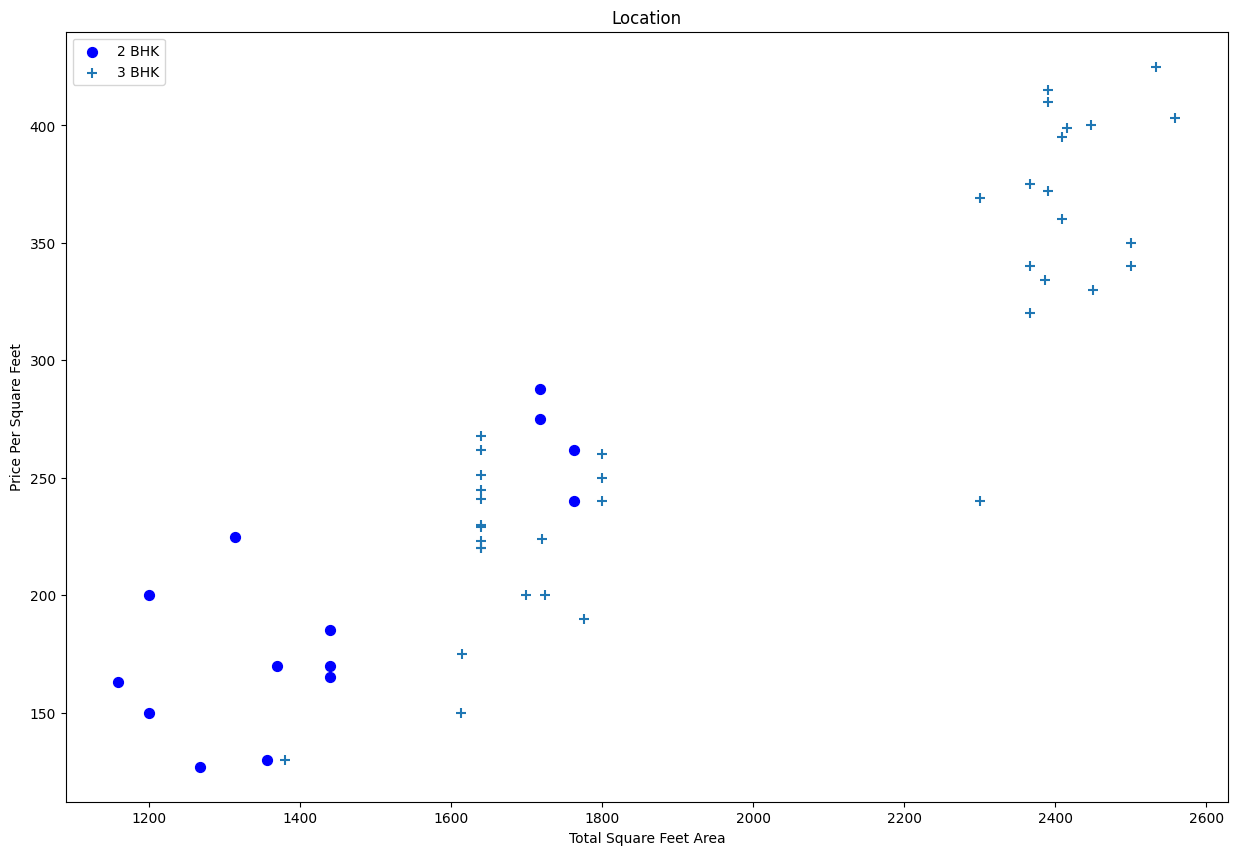

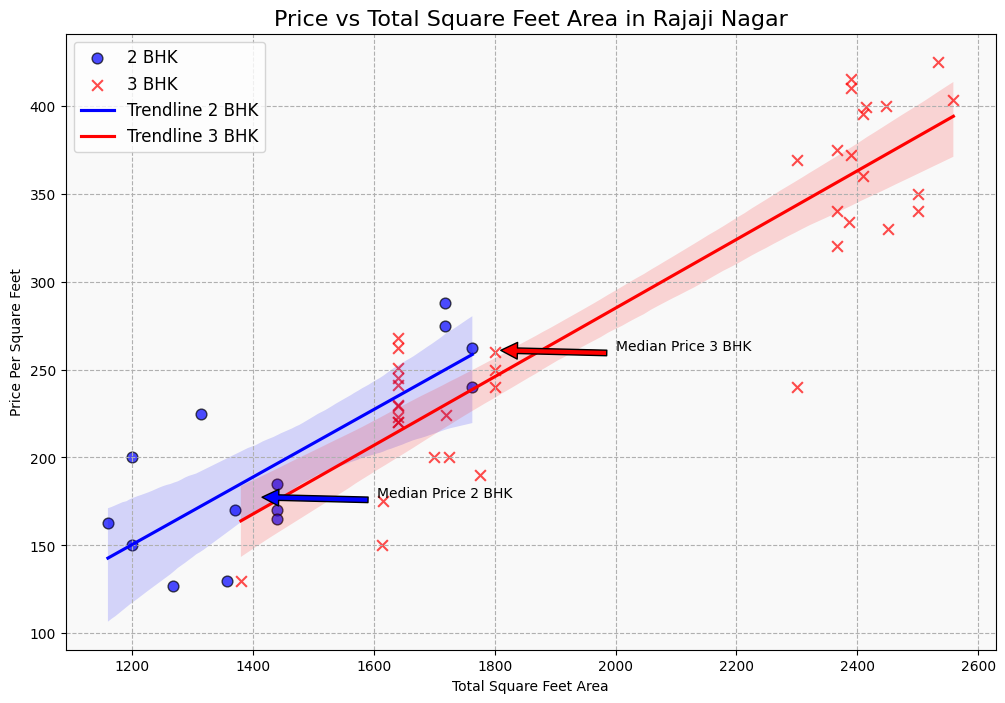

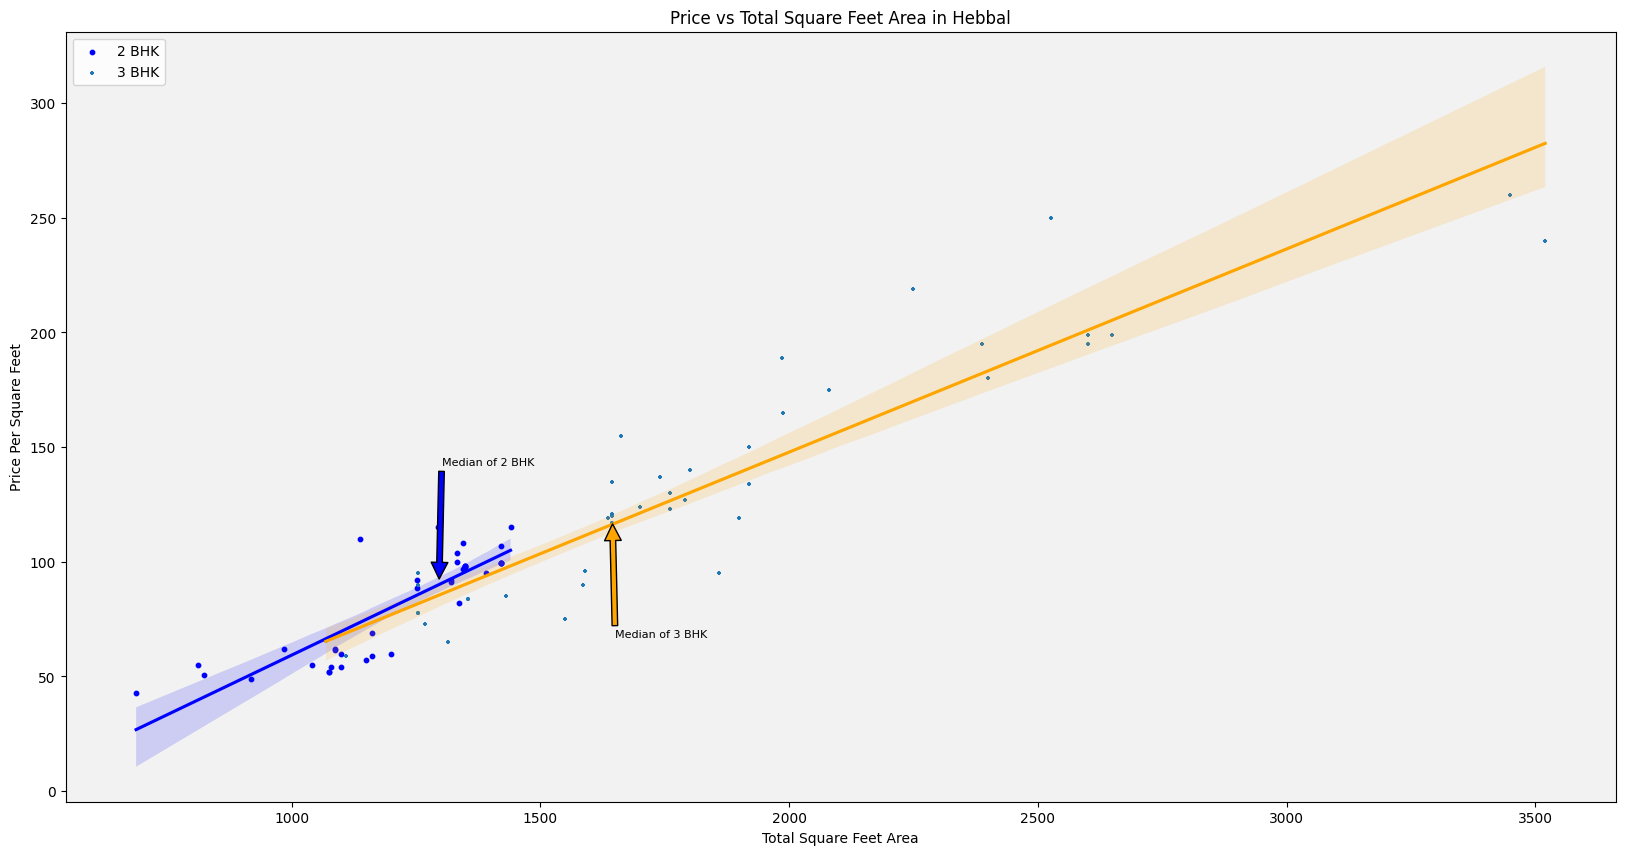

<Figure size 1500x1000 with 0 Axes>

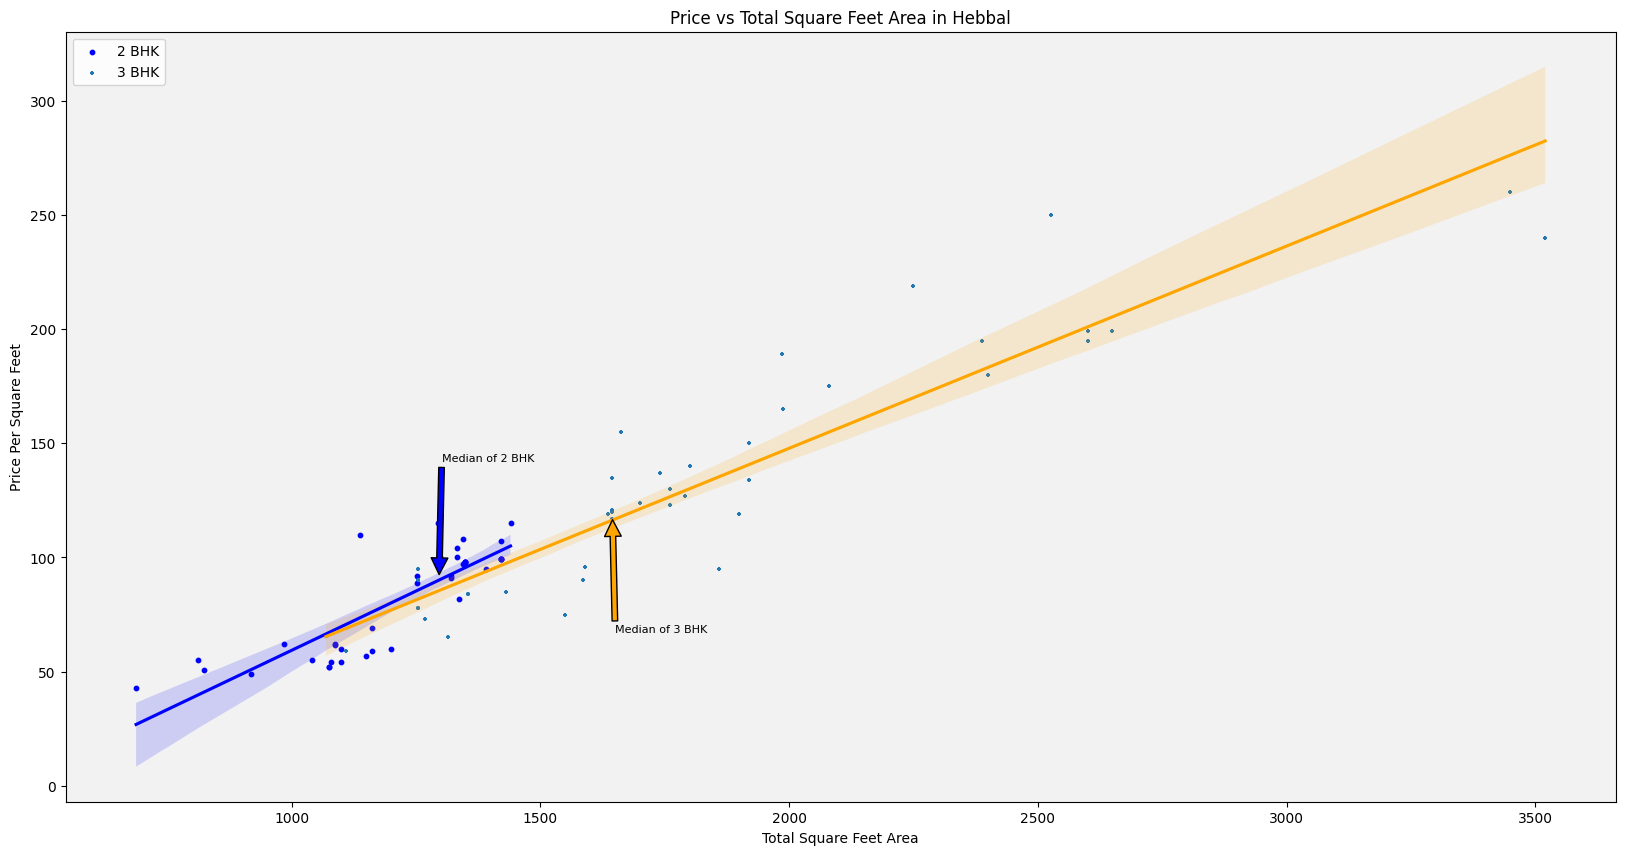

84.5729766421137

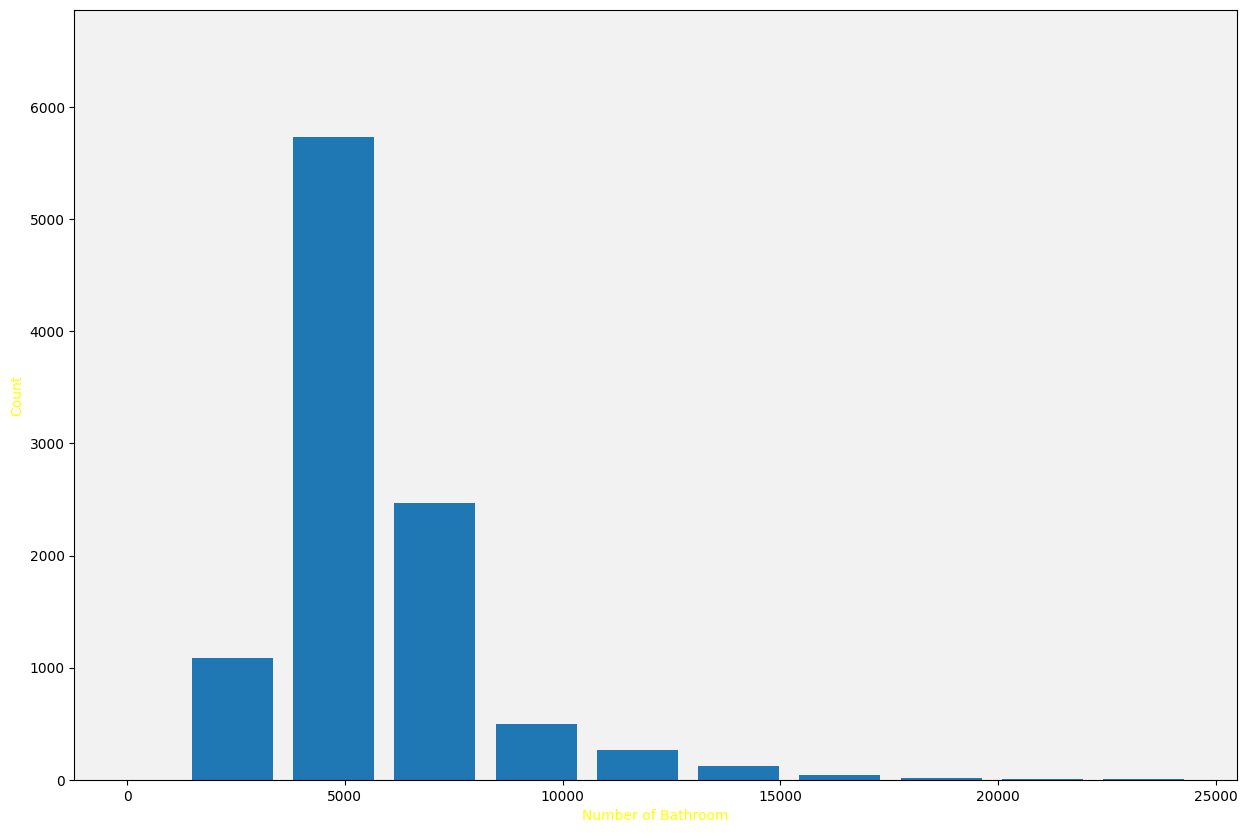

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (20,10)

df1 = pd.read_csv('/content/bengaluru_house_prices.csv')
df1.head()

df2 = df1.drop (['area_type', 'society','balcony','availability'], axis = 'columns')
df2.head()
df2.isnull().sum()

df3 = df2.dropna()
df3.isnull().sum()
df3['size'].unique()
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()
df3['bhk'].unique()

df3[df3.bhk>20]

df3.total_sqft.unique()

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)].head(10)

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

convert_sqft_to_num('2000 - 2850 ')
convert_sqft_to_num('4125Perch')

df4  = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()
df4.loc[30]
df5= df4.copy()
df5['price_per_sqft']  = df5['price']*100000/df5['total_sqft']
df5.head()
len(df5['location'].unique())

df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

len(location_stats[location_stats<=10])
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

len(df5.location.unique())

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

df5.head(10)

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape
df6.price_per_sqft.describe()


def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby ('location'):
        mean = np.mean(subdf.price_per_sqft)
        standerd_deviation = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean - standerd_deviation)) & (subdf.price_per_sqft<=(mean + standerd_deviation))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color ='blue', label ='2 BHK', s = 50)
    plt.scatter (bhk3.total_sqft,bhk3.price, marker= '+', label = '3 BHK' , s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Location')
    plt.legend()


plot_scatter_chart(df7, 'Rajaji Nagar')


import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]

    plt.figure(figsize=(12, 8))  # Adjust figure size

    # Scatter plot for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=60, alpha=0.7, edgecolors='k')

    # Scatter plot for 3 BHK with different marker style
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='x', color='red', label='3 BHK', s=60, alpha=0.7, edgecolors='k')

    # Add trend lines
    sns.regplot(x=bhk2.total_sqft, y=bhk2.price, scatter=False, color='blue', label='Trendline 2 BHK')
    sns.regplot(x=bhk3.total_sqft, y=bhk3.price, scatter=False, color='red', label='Trendline 3 BHK')

    # Annotate median prices
    plt.annotate('Median Price 2 BHK', xy=(bhk2.total_sqft.median(), bhk2.price.median()), xytext=(bhk2.total_sqft.median()+200, bhk2.price.median()),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    plt.annotate('Median Price 3 BHK', xy=(bhk3.total_sqft.median(), bhk3.price.median()), xytext=(bhk3.total_sqft.median()+200, bhk3.price.median()),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location), fontsize=16)  # Custom title font size
    plt.legend(fontsize=12)  # Custom legend font size
    plt.grid(True, linestyle='--')  # Add gridlines with dashed style
    plt.gca().set_facecolor('#f9f9f9')  # Change background color

    plt.show()


    import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]

    plt.figure(figsize=(12, 8))  # Adjust figure size

    # Scatter plot for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=60, alpha=0.7, edgecolors='k')

    # Scatter plot for 3 BHK with different marker style
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='x', color='red', label='3 BHK', s=60, alpha=0.7, edgecolors='k')

    # Add trend lines
    sns.regplot(x=bhk2.total_sqft, y=bhk2.price, scatter=False, color='blue', label='Trendline 2 BHK')
    sns.regplot(x=bhk3.total_sqft, y=bhk3.price, scatter=False, color='red', label='Trendline 3 BHK')

    # Annotate median prices
    plt.annotate('Median Price 2 BHK', xy=(bhk2.total_sqft.median(), bhk2.price.median()), xytext=(bhk2.total_sqft.median()+200, bhk2.price.median()),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    plt.annotate('Median Price 3 BHK', xy=(bhk3.total_sqft.median(), bhk3.price.median()), xytext=(bhk3.total_sqft.median()+200, bhk3.price.median()),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location), fontsize=16)  # Custom title font size
    plt.legend(fontsize=12)  # Custom legend font size
    plt.grid(True, linestyle='--')  # Add gridlines with dashed style
    plt.gca().set_facecolor('#f9f9f9')  # Change background color

    plt.show()

# Example usage
plot_scatter_chart(df7, 'Rajaji Nagar')


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_scatter_chart(df, location, sample_size=1000):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]

    # Filter out extreme outliers
    bhk2_filtered = bhk2[bhk2.price <= np.percentile(bhk2.price, 99)]  # Filter out top 1% of prices
    bhk3_filtered = bhk3[bhk3.price <= np.percentile(bhk3.price, 99)]  # Filter out top 1% of prices

    # Sample data to reduce the number of data points
    bhk2_sample = bhk2_filtered.sample(n=min(sample_size, len(bhk2_filtered)))  # Added random_state for reproducibility
    bhk3_sample = bhk3_filtered.sample(n=min(sample_size, len(bhk3_filtered)))  # Added random_state for reproducibility

    # Set background color
    plt.figure(figsize=(20, 10))  # Reduced figure size

    # Scatter plots for 2 BHK and 3 BHK with reduced marker size
    plt.scatter(bhk2_sample.total_sqft, bhk2_sample.price, color='blue', label='2 BHK', s=10)  # Reduced marker size
    plt.scatter(bhk3_sample.total_sqft, bhk3_sample.price, marker='+', label='3 BHK', s=10)  # Reduced marker size

    # Trend lines
    sns.regplot(x=bhk2_sample.total_sqft, y=bhk2_sample.price, scatter=False, color='blue')

    sns.regplot(x=bhk3_sample.total_sqft, y=bhk3_sample.price, scatter=False, color='orange')

    # Annotations for median prices with reduced font size
    plt.annotate('Median of 2 BHK', xy=(np.median(bhk2_sample.total_sqft), np.median(bhk2_sample.price)), xytext=(np.median(bhk2_sample.total_sqft)+5, np.median(bhk2_sample.price)+50),
                 arrowprops=dict(facecolor='blue', shrink=0.01), fontsize=8)  # Reduced font size
    plt.annotate('Median of 3 BHK', xy=(np.median(bhk3_sample.total_sqft), np.median(bhk3_sample.price)), xytext=(np.median(bhk3_sample.total_sqft)+5, np.median(bhk3_sample.price)-50),
                 arrowprops=dict(facecolor='orange', shrink=0.01), fontsize=8)  # Reduced font size

    # plt.xlim(500,1500)
    # plt.ylim(2,10)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location))
    plt.legend()
    plt.grid(False)
    plt.gca().set_facecolor('#f2f2f2')  # Set background color
    # plt.yscale('log')
    plt.show()
    plt.savefig('plot1.png')




# Example usage with reduced sample size
plot_scatter_chart(df7, 'Hebbal', sample_size=1000)



def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats ['bhk'] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['means'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

plot_scatter_chart(df8, 'Hebbal')

matplotlib.rcParams['figure.figsize'] = (10,6)

plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.gca().set_facecolor('#f2f2f2')
plt.xlabel('Price Per Square Feet', color='Yellow')
plt.ylabel('Count', color='Yellow')


df8[df8.bath>10]

plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

df8[df8.bath>df8.bath+2]
df9 = df8[df8.bath<df8.bath+2]
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
dumies = pd.get_dummies(df10.location)
df11 = pd.concat([df10, dumies.drop('other',axis = 'columns')], axis='columns')
df12 = df11.drop('location', axis='columns')
X = df12.drop('price', axis='columns')
y = df12.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf=  LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'LinearRegression' : {
            'model' : LinearRegression(),
            'params' : {

            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)


def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

predict_price('1st Phase JP Nagar', 1000,2,2)
